读取json格式数据

In [14]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 

# 读取数据
data = pd.read_json('data.json')
data.head()

,x,y
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


将数据转换为numpy array，以便输入模型训练

In [15]:
temp_data = []
for i in range(len(data['x'])):
  temp_data.append(np.asarray(data['x'][i]))

print(temp_data[0])

#dataset = tf.data.Dataset.from_tensor_slices((data['x'].values, data['y'].values))

[0.     0.     0.     ... 0.0036 0.     0.    ]


将数据和对应的标签分别提取出来，并将标签编码为独热码

In [16]:
alldata = np.asarray(temp_data)
allabel = np.asarray(data['y'])


In [17]:
from keras.utils.np_utils import to_categorical
allabel = to_categorical(allabel)
print(allabel)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
alldata = np.expand_dims(alldata, axis=2)
alldata.shape

(4081, 1147, 1)

将所有数据分割为训练集和测试集

In [19]:
x_train = alldata[:3200]
x_test = alldata[3200:]
y_train = allabel[:3200]
y_test = allabel[3200:]

搭建网络

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [21]:
vgg = models.Sequential()

vgg.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(1147,1)))
vgg.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
vgg.add(layers.MaxPool1D())

'''vgg.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(128, kernel_size=3, activation='relu'))
vgg.add(layers.MaxPool1D())

vgg.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(256, kernel_size=3, activation='relu'))
vgg.add(layers.MaxPool1D())

vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.MaxPool1D())

vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.Conv1D(512, kernel_size=3, activation='relu'))
vgg.add(layers.MaxPool1D())'''

vgg.add(layers.Flatten())
vgg.add(layers.Dense(64, activation='relu'))
vgg.add(layers.Dense(3, activation='softmax'))
vgg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1145, 64)          256       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1143, 64)          12352     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 571, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2338880   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 2,351,683
Trainable params: 2,351,683
Non-trainable params: 0
____________________________________________

In [ ]:
'''from keras import losses
from keras import metrics
vgg.compile(optimizer=optimizers.RMSprop(lr=0.001),
      loss=losses.binary_crossentropy,
      metrics=[metrics.binary_accuracy])'''

训练网络

In [22]:
vgg.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

history = vgg.fit(x_train,
          y_train,
          epochs=50,
          batch_size=100,
          validation_data=(x_test, y_test))

Epoch 1/50
32/32 [==============================] - 11s 349ms/step - loss: 0.8620 - accuracy: 0.6131 - val_loss: 0.7605 - val_accuracy: 0.6867
Epoch 2/50
32/32 [==============================] - 11s 345ms/step - loss: 0.7649 - accuracy: 0.6794 - val_loss: 0.7516 - val_accuracy: 0.6822
Epoch 3/50
32/32 [==============================] - 11s 345ms/step - loss: 0.7192 - accuracy: 0.6997 - val_loss: 0.7463 - val_accuracy: 0.6958
Epoch 4/50
32/32 [==============================] - 11s 345ms/step - loss: 0.6818 - accuracy: 0.7275 - val_loss: 0.7340 - val_accuracy: 0.7049
Epoch 5/50
32/32 [==============================] - 11s 346ms/step - loss: 0.6330 - accuracy: 0.7459 - val_loss: 0.7644 - val_accuracy: 0.7060
Epoch 6/50
32/32 [==============================] - 11s 345ms/step - loss: 0.5958 - accuracy: 0.7606 - val_loss: 0.8362 - val_accuracy: 0.7060
Epoch 7/50
32/32 [==============================] - 11s 346ms/step - loss: 0.5750 - accuracy: 0.7634 - val_loss: 0.8175 - val_accuracy: 0.6958

绘制准确率曲线

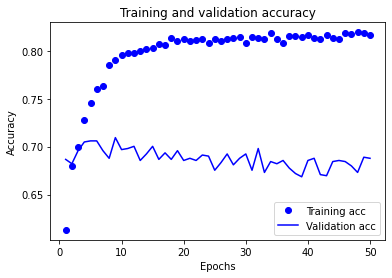

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

'''plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()'''

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()